<a href="https://colab.research.google.com/github/kiharalab/Emap2sec/blob/master/Emap2sec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emap2Sec

Emap2sec is a computational tool using deep learning that can accurately identify protein secondary structures, alpha helices, beta sheets, others (coils/turns), in cryo-Electron Microscopy (EM) maps of medium to low resolution.

<b>License:</b> GPL v3 for academic use. (For commercial use, please contact us for different licensing)

<b>Contact:</b> Daisuke Kihara (dkihara@purdue.edu)

Copyright (C) 2018 Sai Raghavendra Maddhuri, Genki Terashi, Daisuke Kihara, and Purdue University.

<b>Cite : </b>
<blockquote>
Sai Raghavendra Maddhuri Venkata Subramaniya, Genki Terashi, & Daisuke Kihara, Protein secondary structure detection in intermediate-resolution cryo-EM maps using deep learning. Nature Methods. (2019)
</blockquote>

### Project website: http://kiharalab.org/emsuites/emap2sec.php

# Run Emap2Sec pipeline (6 steps)

1. Install dependencies : Install libraries and download the models
2. Input cryo-EM Map : Upload the cryo-em map file, the input file
3. Input contour level : Set the contour level
4. Run Emap2Sec : Run the Deep Learning model pipeline (pre-process, inference, post-process)
5. Download estimation output : Download the resulting .pdb file
6. Visualize the prediction : Visualize the .pdb file with predicted results in 3D

Some guidelines before starting - 
1. Please make sure the notebook is already connected to **GPU**, Emap2sec+ needs GPU support to run. Click the right top button **"connect"**, then the notebook will automatically connect to a gpu machine
2. At any point if you face any errors and get unexpected outputs, please disconnect and delete runtime (Menu -> Runtime -> Disconnect and Delete Runtime. And then start executing again. 

In [ ]:
#@title Install dependencies <a name="Dependency"></a>
#@markdown Please make sure the notebook is already connected to **GPU**, Emap2sec needs GPU support to run.<br>
#@markdown Click the right top button **"connect"**, then the notebook will automatically connect to a gpu machine
%cd /content

!git clone "https://github.com/kiharalab/Emap2sec.git"

%cd Emap2sec
%mkdir models
%cd models
%mkdir emap2sec_models_exp1
%mkdir emap2sec_models_exp2

%cd /content/Emap2sec/models/emap2sec_models_exp1
# download phase 1 model files
!wget "https://kiharalab.org/Emap2sec_models/emap2sec_models_exp1/checkpoint"
!wget "https://kiharalab.org/Emap2sec_models/emap2sec_models_exp1/emap2sec_L1_exp.ckpt-108000.data-00000-of-00001"
!wget "https://kiharalab.org/Emap2sec_models/emap2sec_models_exp1/emap2sec_L1_exp.ckpt-108000.index"
!wget "https://kiharalab.org/Emap2sec_models/emap2sec_models_exp1/emap2sec_L1_exp.ckpt-108000.meta"

%cd /content/Emap2sec/models/emap2sec_models_exp2
# download phase 2 model files
!wget "https://kiharalab.org/Emap2sec_models/emap2sec_models_exp2/checkpoint"
!wget "https://kiharalab.org/Emap2sec_models/emap2sec_models_exp2/emap2sec_L2_exp.ckpt-20000.data-00000-of-00001"
!wget "https://kiharalab.org/Emap2sec_models/emap2sec_models_exp2/emap2sec_L2_exp.ckpt-20000.index"
!wget "https://kiharalab.org/Emap2sec_models/emap2sec_models_exp2/emap2sec_L2_exp.ckpt-20000.meta"

%cd /content/Emap2sec/
%mkdir /content/results

!pip install tensorflow-gpu==1.14
!pip install py3Dmol

import urllib.request

get_url= urllib.request.urlopen('https://kiharalab.org/emsuites/emap2sec_count.php?pwd=daq_dklab')

/content
fatal: destination path 'Emap2sec' already exists and is not an empty directory.
/content/Emap2sec
mkdir: cannot create directory ‘models’: File exists
/content/Emap2sec/models
mkdir: cannot create directory ‘emap2sec_models_exp1’: File exists
mkdir: cannot create directory ‘emap2sec_models_exp2’: File exists
/content/Emap2sec/models/emap2sec_models_exp1
--2022-09-16 19:07:18--  https://kiharalab.org/Emap2sec_models/emap2sec_models_exp1/checkpoint
Resolving kiharalab.org (kiharalab.org)... 128.210.26.20
Connecting to kiharalab.org (kiharalab.org)|128.210.26.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 343
Saving to: ‘checkpoint.2’

checkpoint.2        100%[===================>]     343  --.-KB/s    in 0s      

2022-09-16 19:07:18 (63.8 MB/s) - ‘checkpoint.2’ saved [343/343]

--2022-09-16 19:07:18--  https://kiharalab.org/Emap2sec_models/emap2sec_models_exp1/emap2sec_L1_exp.ckpt-108000.data-00000-of-00001
Resolving kiharalab.org (kiharalab.org).

In [ ]:
#@title Input cryo-EM map <a name="Map"></a>
#@markdown You can tick the below checkbox to use default  cryo-EM map as example <br>
#@markdown Please untick the following checkbox and run the cell to upload your cryo-EM map file.   
#@markdown <br>
#@markdown <br> **Support file format: .mrc, .mrc.gz**
from google.colab import files
import os
import os.path
import re
import hashlib
import random
import string

input_map = ""

rand_letters = string.ascii_lowercase
rand_letters = ''.join(random.choice(rand_letters) for i in range(20))
use_author_example = True #@param {type:"boolean"}
if not use_author_example:
  root_dir = "/content/Emap2sec/data"
  upload_dir = os.path.join(root_dir,rand_letters)
  if not os.path.exists(upload_dir):
    os.mkdir(upload_dir)
  os.chdir(upload_dir)
  map_input = files.upload()
  for fn in map_input.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(map_input[fn])))
    input_map = os.path.abspath(fn)
    print("Map save to %s"%input_map)
  os.chdir(root_dir)
else:
  print("you have chosen to use author's example, you can not upload map files any more.")
  input_map = "data/1733.mrc"


you have chosen to use author's example, you can not upload map files any more.


In [ ]:
#@title Input contour level
#@markdown Specify the recommended contour level for your map in contour_level variable.
#@markdown If your recommended contour level is 2.5 then enter 2.5 in the input filed below
contour_level = 2.5 #@param {type:"number"}


In [ ]:
#@title Run Emap2Sec
#@markdown The Emap2SecPlus model will run and the whole pipeline will be executed sequentially. And a .pdb file will be saved as a result.

#!/bin/bash

%cd /content/Emap2sec/

!chmod +x *
!chmod -R 777 map2train_src/
!chmod -R 777 /content/Emap2sec

# #Inputs (if map and contour_level are found empty, then they are set to default values)
if input_map == "":
  input_map = "data/1733.mrc"

if contour_level == "":
  contour_level=2.5

#Vars
filename='data/input_file.txt'
trimmap='data/trimmap'
dataset='data/dataset'
output='outputP2_dataset'
visual_output='visual.pdb'

#Code
%cd map2train_src
!make
%cd /content/Emap2sec/
!map2train_src/bin/map2train "{input_map}" -c "{contour_level}" > "{trimmap}" 
!python data_generate/dataset.py {trimmap} {dataset}
!echo {dataset} > {filename}
!echo "INFO : Running Emap2sec.py with arguments $filename"
!python emap2sec/Emap2sec.py {filename}
!echo "INFO : Running Visual.pl"
!Visual/Visual.pl "{trimmap}" "{output}" -p > "{visual_output}"
!cp visual.pdb ../results
!echo "INFO : Done"

/content/Emap2sec
/content/Emap2sec/map2train_src
cd gzstream; make
make[1]: Entering directory '/content/Emap2sec/map2train_src/gzstream'
make[1]: Nothing to be done for 'default'.
make[1]: Leaving directory '/content/Emap2sec/map2train_src/gzstream'
mkdir -p bin
g++  	main.cpp -o bin/map2train -O1 -std=c++11 -march=native -Wall -fopenmp -Lgzstream -lgzstream -lz 
main.cpp: In function ‘int main(int, char**)’:
main.cpp:407:9: warning: unused variable ‘cacnt’ [-Wunused-variable]
     int cacnt=0;
         ^~~~~
main.cpp:403:7: warning: unused variable ‘Nact’ [-Wunused-variable]
   int Nact,Nact_pre;
       ^~~~
main.cpp:403:12: warning: unused variable ‘Nact_pre’ [-Wunused-variable]
   int Nact,Nact_pre;
            ^~~~~~~~
main.cpp:143:7: warning: unused variable ‘dmode’ [-Wunused-variable]
  bool dmode = false;
       ^~~~~
main.cpp:144:7: warning: unused variable ‘imode’ [-Wunused-variable]
  bool imode = false;
       ^~~~~
In file included from Grid.h:76:0,
                 from 

In [ ]:
#@title Download predicted output <a name="Download"></a>
#@markdown The pdb file with estimated score will be compressed and downloaded. Alos, a python script will be downladed using which you can visualize the Emap2Sec output using by Pymol.

%cd "/content/results"

from google.colab import files
import os

!cp /content/Emap2sec/Visual/pymol_script.py /content/results
zip_format = True #@param {type:"boolean"} 
#@markdown If you want to download tar.gz format file, do not choose **zip_format** box.
download_file_path = "visual.pdb"
if zip_format:
  target_path = "result.zip"
else:
  target_path = "result.tar.gz"

if zip_format:
  os.system(f"zip {target_path} {download_file_path} pymol_script.py")
else:
  os.system(f"tar -zcvf {target_path} {download_file_path} pymol_script.py")
files.download(target_path)

/content/results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

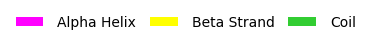

In [ ]:
#@title Model prediction visualization (3D) <a name="Visualization"></a>
#@markdown The model prediction saved in pdb file will be visualized using 3Dmol.js library. Please look at the output of the cell below.

import os
import matplotlib.pyplot as plt

def plot_plddt_legend():
  thresh = ['Alpha Helix','Beta Strand','Coil']
  plt.figure(figsize=(1,0.1),dpi=100)
  ########################################
  for c in ["#FF00FF","#FFFF00","#32CD32"]:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False,
             loc='center', ncol=6,
             handletextpad=1,
             columnspacing=1,
             markerscale=0.5,)
  plt.axis(False)
  return plt

#Visualize
import py3Dmol
def show_pdb(output_pdb_path):
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
  print(os.path.exists(output_pdb_path))
  view.addModel(open(output_pdb_path,'r').read(),'pdb')
  view.setStyle({'chain':'A'},{'sphere': {'color':'limegreen'}})
  view.setStyle({'chain':'B'},{'sphere': {'color':'yellow'}})
  view.setStyle({'chain':'C'},{'sphere': {'color':'magenta'}})
  view.zoomTo()
  return view
show_pdb("/content/results/visual.pdb").show()
plot_plddt_legend().show() 

## Note for PyMol visualization
You can also visualize the predicted output of the Emap2Sec using locally using PyMol. You can use the script provided in the downloaded folder.

Upon pymol installation, from pymol download directory you can run the below code from command line,

pymol file_name.pdb

or Open Pymol GUI and load visual.pdb.

Then run pymol_script.py (included in the downloaded directory) from the pymol command line. This gives you the final clean secondary structure visualization.


## Contact

If you face any issues or have any questions, please reach out to us at this email address Daisuke Kihara (dkihara@purdue.edu)